<a href="https://colab.research.google.com/github/UmairDL/AI-Story-telling-model/blob/main/ai_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image Caption: cartoon of a man with a hat and sunglasses wearing a hat


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


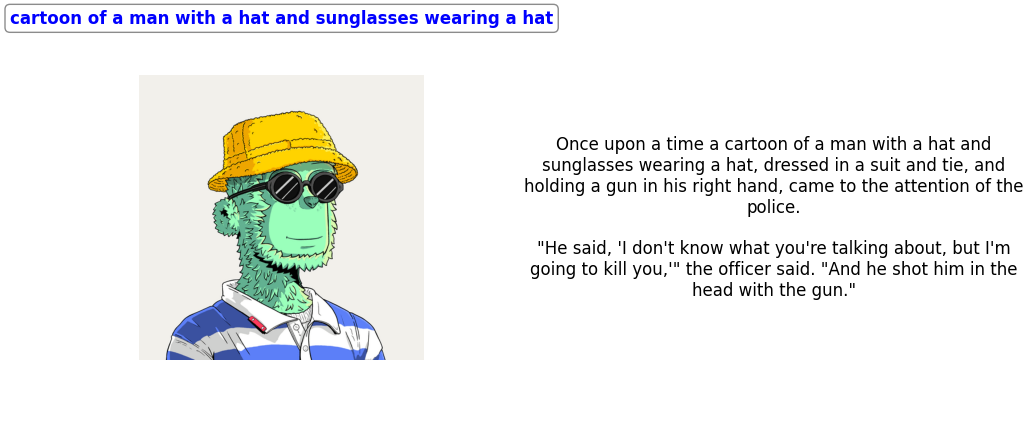

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration, GPT2LMHeadModel, GPT2Tokenizer
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Blip image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model_blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to("cpu")

img_url = '/content/1.png'
raw_image = Image.open(img_url).convert('RGB')

# conditional image captioning
inputs_blip = processor(raw_image,  return_tensors="pt")

out_blip = model_blip.generate(**inputs_blip)
caption = processor.decode(out_blip[0], skip_special_tokens=True)
print("Image Caption:", caption)

# GPT-2 story generation
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained("gpt2")
model_gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")


# Create a more explicit prompt
prompt = f"Once upon a time a {caption},"

# Tokenize and generate story using GPT-2
input_ids_gpt2 = tokenizer_gpt2.encode(prompt, return_tensors="pt")
output_gpt2 = model_gpt2.generate(input_ids_gpt2, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95)
generated_story_gpt2 = tokenizer_gpt2.decode(output_gpt2[0], skip_special_tokens=True)

# Display image with story
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display image with caption
ax1.imshow(raw_image)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax1.text(0.5, 1.2, caption, ha="center", va="center", color="blue", weight="bold",
         bbox=bbox_props, transform=ax1.transAxes, fontsize=12)
ax1.axis("off")

# Display generated story with limited length
ax2.text(0.5, 0.5, generated_story_gpt2, ha="center", va="center", color="black", fontsize=12, wrap=True)
ax2.axis("off")

plt.tight_layout()
plt.show()

from gtts import gTTS
import os
import IPython.display as ipd

# Use gTTS to convert the generated story to audio
tts = gTTS(generated_story_gpt2, lang='en')

# Save the audio to a file
audio_file = '/content/generated_audio.mp3'
tts.save(audio_file)

# Play the audio
ipd.Audio(audio_file)



/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image Caption: there is a young boy kicking a soccer ball on the grass


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


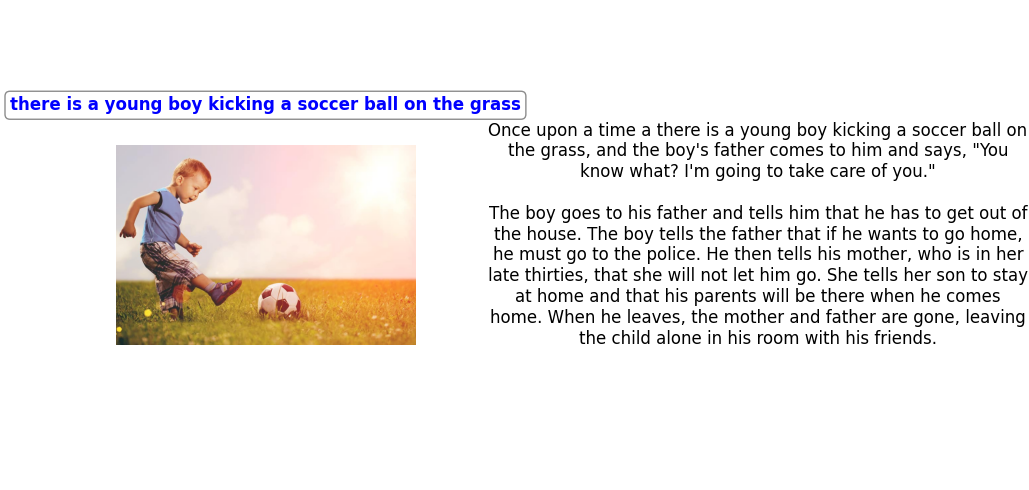

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration, GPT2LMHeadModel, GPT2Tokenizer
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Blip image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model_blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to("cpu")

img_url = '/content/bigstock-Sports-kid-Boy-playing-footba-77211935.jpg'
raw_image = Image.open(img_url).convert('RGB')

# conditional image captioning
inputs_blip = processor(raw_image,  return_tensors="pt")

out_blip = model_blip.generate(**inputs_blip)
caption = processor.decode(out_blip[0], skip_special_tokens=True)
print("Image Caption:", caption)

# GPT-2 story generation
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained("gpt2")
model_gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")


# Create a more explicit prompt
prompt = f"Once upon a time a {caption},"

# Tokenize and generate story using GPT-2
input_ids_gpt2 = tokenizer_gpt2.encode(prompt, return_tensors="pt")
output_gpt2 = model_gpt2.generate(input_ids_gpt2, max_length=150, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95)
generated_story_gpt2 = tokenizer_gpt2.decode(output_gpt2[0], skip_special_tokens=True)

# Display image with story
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display image with caption
ax1.imshow(raw_image)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax1.text(0.5, 1.2, caption, ha="center", va="center", color="blue", weight="bold",
         bbox=bbox_props, transform=ax1.transAxes, fontsize=12)
ax1.axis("off")

# Display generated story with limited length
ax2.text(0.5, 0.5, generated_story_gpt2, ha="center", va="center", color="black", fontsize=12, wrap=True)
ax2.axis("off")

plt.tight_layout()
plt.show()

from gtts import gTTS
import os
import IPython.display as ipd

# Use gTTS to convert the generated story to audio
tts = gTTS(generated_story_gpt2, lang='en')

# Save the audio to a file
audio_file = '/content/generated_audio.mp3'
tts.save(audio_file)

# Play the audio
ipd.Audio(audio_file)

